In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import math

In [3]:
data=load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
features=pd.DataFrame(data.data,columns=data.feature_names)
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
target=pd.DataFrame(data.target,columns=['target'])

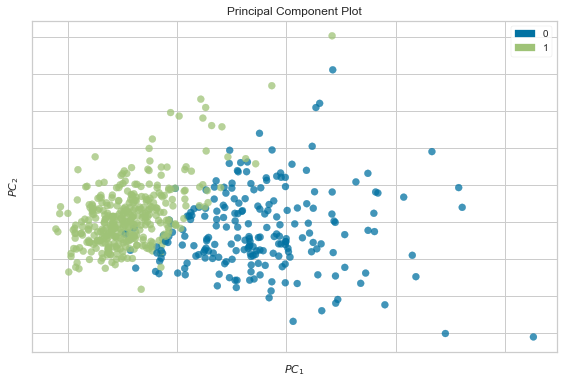

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [14]:
from yellowbrick.features import PCA
visualizer = PCA(projection=2)

visualizer.fit_transform(features,data['target'])          # Fit the data to the visualizer
    # Transform the data
visualizer.show()              # Finalize and render the figure

In [5]:
df=pd.concat([features,target],axis=1)
df=df.drop(['mean concave points', 'mean area','worst perimeter','mean compactness','worst area','worst compactness',
            'mean radius','mean concavity','radius error','compactness error','mean texture','mean perimeter','mean smoothness'
           ,'perimeter error','worst concavity'],axis=1)
corr=df.corr()
corr

,mean symmetry,mean fractal dimension,texture error,area error,smoothness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst concave points,worst symmetry,worst fractal dimension,target
mean symmetry,1.000000,0.479921,0.128053,0.223970,0.187321,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.426675,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,0.479921,1.000000,0.164174,-0.090170,0.401964,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,0.504942,0.175325,0.334019,0.767297,0.012838
texture error,0.128053,0.164174,1.000000,0.111567,0.397243,0.194998,0.230283,0.411621,0.279723,-0.111690,0.409003,-0.073658,-0.119638,-0.128215,-0.045655,0.008303
area error,0.223970,-0.090170,0.111567,1.000000,0.075150,0.270895,0.415730,0.134109,0.127071,0.757373,0.196497,0.125389,0.538166,0.074126,0.017539,-0.548236
smoothness error,0.187321,0.401964,0.397243,0.075150,1.000000,0.268685,0.328429,0.413506,0.427374,-0.230691,-0.074743,0.314457,-0.102007,-0.107342,0.101480,0.067016
concavity error,0.342627,0.446630,0.194998,0.270895,0.268685,1.000000,0.771804,0.309429,0.727372,0.186904,0.100241,0.168481,0.440472,0.197788,0.439329,-0.253730
concave points error,0.393298,0.341198,0.230283,0.415730,0.328429,0.771804,1.000000,0.312780,0.611044,0.358127,0.086741,0.215351,0.602450,0.143116,0.310655,-0.408042
symmetry error,0.449137,0.345007,0.411621,0.134109,0.413506,0.309429,0.312780,1.000000,0.369078,-0.128121,-0.077473,-0.012662,-0.030413,0.389402,0.078079,0.006522
fractal dimension error,0.331786,0.688132,0.279723,0.127071,0.427374,0.727372,0.611044,0.369078,1.000000,-0.037488,-0.003195,0.170568,0.215204,0.111094,0.591328,-0.077972
worst radius,0.185728,-0.253691,-0.111690,0.757373,-0.230691,0.186904,0.358127,-0.128121,-0.037488,1.000000,0.359921,0.216574,0.787424,0.243529,0.093492,-0.776454


In [6]:
dic=[]
for i in corr.values:
    c=-1
    for j in i:
        if(j>0.8):
            c+=1
    dic.append(c)
n1=np.array(dic)
maxa=dic.index(max(dic))
maxa,n1,df.columns[maxa]

(0, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'mean symmetry')

In [7]:
#dropping multicollinearity
features=features.drop(['mean concave points', 'mean area','worst perimeter','mean compactness','worst area'
                        ,'worst compactness','mean radius','mean concavity','radius error','compactness error','mean texture'
                        ,'mean perimeter','mean smoothness','perimeter error','worst concavity'],axis=1)

In [8]:
features.columns

Index(['mean symmetry', 'mean fractal dimension', 'texture error',
       'area error', 'smoothness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst smoothness',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [9]:
corrs=[abs(corr[attr]['target']) for attr in list(df)]
#Zip the corrs array with the features array
l=list(zip(corrs,list(features)))
#Now sort the above array by their corr. value in ascending order
l.sort()
corrs,labels=list(zip((*l)))

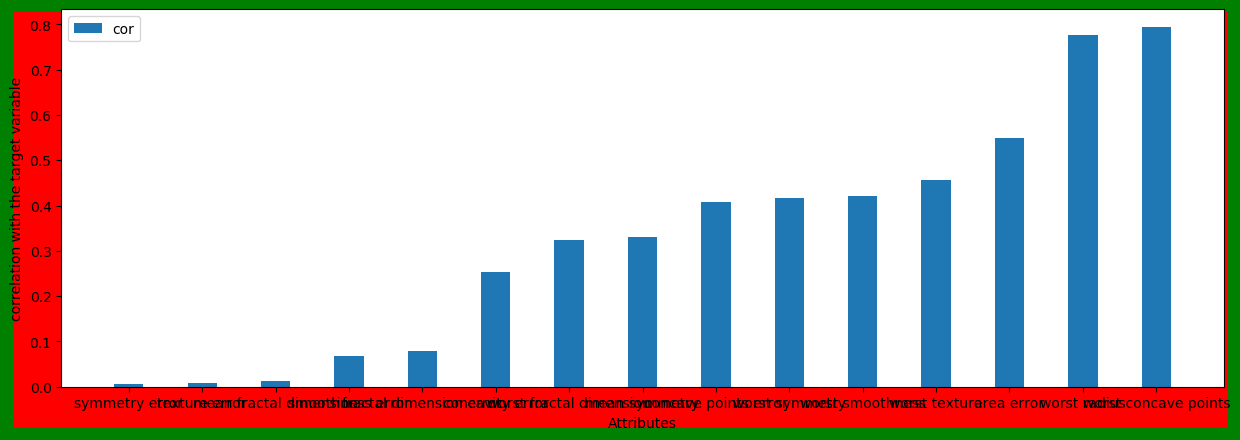

In [10]:
plt.figure(figsize=(15,5),dpi=100,facecolor="red",edgecolor="green",linewidth=18)
plt.bar(labels,corrs,width=0.4)
plt.xlabel('Attributes')
plt.legend(["cor"])
plt.ylabel('correlation with the target variable')
plt.show()

In [11]:
'''fig,ax=plt.subplots(5,6,figsize=(30,20))
k,l=0,0
for i in data.feature_names:
    ax[k][l].scatter(features[i],target)
    ax[k][l].set_xlabel(i)
    l+=1
    if(l==6):
        k+=1
        l=0'''

'fig,ax=plt.subplots(5,6,figsize=(30,20))\nk,l=0,0\nfor i in data.feature_names:\n    ax[k][l].scatter(features[i],target)\n    ax[k][l].set_xlabel(i)\n    l+=1\n    if(l==6):\n        k+=1\n        l=0'

In [13]:
#features before removing multicollinearity
#my_features 
#features=features.drop(['mean compactness','mean concave points','worst fractal dimension','area error','compactness error',
#'concave points error','concavity error','fractal dimension error','mean concavity','mean symmetry','perimeter error',
#'radius error','symmetry error','texture error','worst concavity','worst smoothness','worst symmetry'],axis=1)

#permutationimportance
#feaures=features.drop([ 'mean texture','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error','smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error', 'fractal dimension error','worst compactness', 'worst concavity','worst symmetry', 'worst fractal dimension'],axis=1)
#features after removing multicollinearity

#my_features
features=features.drop(['texture error','mean symmetry','worst symmetry','area error'],axis=1)
#permutation
#features=features.drop(['mean symmetry', 'mean fractal dimension', 'texture error','area error', 'smoothness error', 'concavity error',
#                         'concave points error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst symmetry', 'worst fractal dimension'],axis=1)
xscaler=MinMaxScaler()
X=xscaler.fit_transform(features)
yscaler=MinMaxScaler()
Y=yscaler.fit_transform(target)
#xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=False)
#xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=42,shuffle=False)

In [14]:
class SVM:
    def __init__(self,init_w,init_b,learn,n_iters,lambda_param=0.0):
        self.w=init_w
        self.b=init_b
        self.lr=learn
        self.niters=n_iters
        self.lamb=lambda_param
    
    def fit(self,x,y):
        y=np.where(y<=0,-1,1)
        for _ in range(self.niters):
            for ind,i in enumerate(x):
                if(y[ind]*(np.dot(self.w,x[ind])+self.b)>=1):
                    dw=2*self.lamb*self.w
                    db=0
                else:
                    dw=2*self.lamb*self.w-y[ind]*x[ind]
                    db=-y[ind]
                self.w-=self.lr*dw
                self.b-=self.lr*db*10
            #print(y[ind]*np.dot(self.w,x[ind])+self.b,self.w,self.b)                    

        #print(self.w)
    def predict(self,x):
        y=np.sign(np.dot(self.w,x)+self.b)
        #print(y,"y")
        return y

In [15]:
err=[]
for i in range(10):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
    n=len(features.columns)
    init_w=np.zeros(n)
    init_b=0
    learn=0.001
    n_iters=150
    svm=SVM(init_w,init_b,learn,n_iters)
    svm.fit(xtrain,ytrain)
    ypred=[]
    for y in xtest:
        ypred.append(svm.predict(y))
    err.append(mean_squared_error(ypred,ytest))

In [16]:
from statistics import mean
print(mean(err))
err

0.3736842105263158


[0.40350877192982454,
 0.35964912280701755,
 0.41228070175438597,
 0.3333333333333333,
 0.35964912280701755,
 0.40350877192982454,
 0.3157894736842105,
 0.40350877192982454,
 0.3684210526315789,
 0.37719298245614036]

In [17]:
ypred=[]
for y in xtest:
    ypred.append(svm.predict(y))

In [18]:
ytesto=np.where(ytest<=0,-1,1)
ytraino=np.where(ytrain<=0,-1,1)

In [19]:
mean_squared_error(ytesto,ypred)

0.24561403508771928

In [20]:
r2_score(ytesto,ypred)


0.7271794871794872

In [28]:
from eli5.permutation_importance import get_score_importances
def score(x,y):
    ypred=[]
    for y1 in x:
        ypred.append(svm.predict(y1))
    return mean_squared_error(ytest,ypred)
base_score, score_decreases = get_score_importances(score, xtest, ytest)
feature_importances = np.mean(score_decreases, axis=0)
feature_importances

array([-0.01403509,  0.        ,  0.        , -0.02105263, -0.01403509,
        0.        , -0.11929825, -0.00701754, -0.04210526, -0.42807018,
       -0.03508772])

In [29]:
ypred=[]
for y in xtrain:
    ypred.append(svm.predict(y))
mean_squared_error(ytraino,ypred)

0.13186813186813187

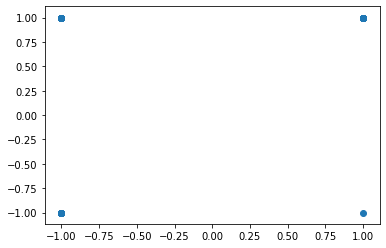

In [30]:
plt.scatter(ytraino,ypred)

In [31]:
f1=pd.DataFrame(ytesto,columns=['ytest'])
f2=pd.DataFrame(ypred,columns=['ypred'])
f=pd.concat([f1,f2],axis=1)

# sklearn

In [32]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(xtrain,ytrain)
ypred1=clf.predict(xtest)

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
mean_squared_error(ytest,ypred1)

0.05263157894736842

In [34]:
r2_score(ytest,ypred1)

0.7661538461538462

In [35]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf, random_state=1).fit(xtrain,ytrain)
eli5.show_weights(perm, feature_names = features.columns.tolist())

Weight,Feature
0.1697 ± 0.0199,worst radius
0.1231 ± 0.0252,worst concave points
0.0286 ± 0.0144,worst texture
0.0101 ± 0.0086,mean fractal dimension
0.0092 ± 0.0122,worst smoothness
0.0084 ± 0.0085,symmetry error
0.0022 ± 0.0048,worst fractal dimension
0.0022 ± 0.0028,fractal dimension error
0.0004 ± 0.0033,concave points error
0 ± 0.0000,concavity error


# LOGISTIC REGRESSION


In [36]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(xtrain, ytrain)
ypred1=logisticRegr.predict(xtest)
mean_squared_error(ypred1,ytest)

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.05263157894736842

In [37]:
r2_score(ypred1,ytest)

0.752622061482821

In [38]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf, random_state=1).fit(xtest,ytest)
eli5.show_weights(perm, feature_names = features.columns.tolist())

Weight,Feature
0.1351 ± 0.0344,worst radius
0.1246 ± 0.0811,worst concave points
0.0211 ± 0.0325,worst texture
0.0088 ± 0.0222,mean fractal dimension
0.0035 ± 0.0263,worst smoothness
0.0018 ± 0.0070,fractal dimension error
0 ± 0.0000,concave points error
0 ± 0.0000,concavity error
-0.0018 ± 0.0070,worst fractal dimension
-0.0018 ± 0.0131,symmetry error


In [ ]:
perm = PermutationImportance(logisticRegr, random_state=1).fit(xtest,ytest)
eli5.show_weights(perm, feature_names = features.columns.tolist())